In [2]:
url1 = (r'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/latest/owid-covid-latest.json')

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import requests, pandas as pd
from bs4 import BeautifulSoup
import seaborn as sns; sns.set()
import urllib.request

pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 400)

In [4]:

#This is live data from the our world in data github. This is the csv they put on the website. Covid19 data.
data=pd.read_json(url1)
data1 = pd.DataFrame(data).T
data1 = data1.astype(str)
data1 = data1[data1 != 'None']
data1['total_deaths'] = data1['total_deaths'].astype(float)
data1['total_tests'] = data1['total_tests'].astype(float)
data1


,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
AFG,Asia,Afghanistan,2021-11-28,157218.0,28.0,46.0,7308.0,0.0,-8.143,3946.688,0.7030000000000001,1.155,183.455,0.0,-0.20400000000000001,1.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5116767.0,4285440.0,3454113.0,NaN,NaN,162172.0,12.84,10.76,8.67,NaN,4071.0,116472.0,0.292,27.78,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
OWID_AFR,NaN,Africa,2021-11-28,8637754.0,5439.0,5127.143,222573.0,72.0,139.0,6288.925,3.96,3.733,162.05,0.052000000000000005,0.101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,235447463.0,148440324.0,98269862.0,397848.0,52613.0,1132267.0,17.14,10.81,7.15,0.03,824.0,878043.0,0.064,NaN,1373486472.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALB,Europe,Albania,2021-11-28,199555.0,418.0,509.571,3089.0,4.0,7.714,69460.35,145.496,177.37,1075.207,1.392,2.685,0.9400000000000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2081782.0,1067769.0,953489.0,60524.0,7112.0,6859.0,72.46,37.17,33.19,2.11,2387.0,1726.0,0.06,45.37,2872934.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN,NaN,NaN,NaN
DZA,Africa,Algeria,2021-11-28,210152.0,172.0,171.429,6058.0,6.0,5.286,4710.172,3.855,3.842,135.779,0.134,0.11800000000000001,1.17,20.0,0.448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12032500.0,6703364.0,5314016.0,13167.0,23526.0,71092.0,26.97,15.02,11.91,0.03,1593.0,27753.0,0.062,39.81,44616626.0,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.7000000000000001,30.4,83.741,1.9,76.88,0.748,NaN,NaN,NaN,NaN
AND,Europe,Andorra,2021-11-28,16712.0,0.0,89.429,131.0,0.0,0.14300000000000002,216045.712,0.0,1156.095,1693.513,0.0,1.847,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228231.0,2950.474,NaN,380.0,4.912,0.147,6.8,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.85,77354.0,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868,NaN,NaN,NaN,NaN
AGO,Africa,Angola,2021-11-28,65144.0,5.0,17.143,1733.0,0.0,0.429,1919.749,0.147,0.505,51.07,0.0,0.013000000000000001,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9026310.0,6266044.0,2760266.0,NaN,NaN,122159.0,26.6,18.47,8.13,NaN,3600.0,48132.0,0.14200000000000002,55.09,33933611.0,23.89,16.8,2.4050000000000002,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581,NaN,NaN,NaN,NaN
AIA,North America,Anguilla,2021-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
#Attempted to create the dataframe from the url but I got a forbidden 403 error.
url2 = ('https://apps.who.int/gho/athena/api/GHO/HWF_000.json?filter=YEAR:2019&filter=text')
url2

'https://apps.who.int/gho/athena/api/GHO/HWF_000.json?filter=YEAR:2019&filter=text'

In [6]:
#Printed encoding of csv file to read the csv.
with open(r'C:\Users\vw191\OneDrive\Documents\GitHub\107SBakst.github.io\data\who_doctors.csv') as f:
        print(f.encoding)

cp1252


In [7]:
#Created the dataframe and cleaned the location column.
data2 = pd.read_csv(r'C:\Users\vw191\OneDrive\Documents\GitHub\107SBakst.github.io\data\who_doctors.csv', encoding ="cp1252")
data2 = data2[data2['Period'] == 2018]
data2['Location'] = data2['Location'].replace('Iran (Islamic Republic of)', 'Iran')
data2['Location'] = data2['Location'].replace('CÃ´te dâ€™Ivoire', "Cote d'Ivoire")
data2['Location'] = data2['Location'].replace('United States of America', 'United States')
data2['Location'] = data2['Location'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')
data2['Location'] = data2['Location'].replace('Russian Federation', 'Russia')
data2['Location'] = data2['Location'].replace('Republic of Korea', 'South Korea')
data2

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,IsLatestYear,Dim1 type,Dim1,Dim1ValueCode,Dim2 type,Dim2,Dim2ValueCode,Dim3 type,Dim3,Dim3ValueCode,DataSourceDimValueCode,DataSource,FactValueNumericPrefix,FactValueNumeric,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
41,HWF_0001,"Medical doctors (per 10,000)",numeric,AFR,Africa,Country,MWI,Malawi,Year,2018,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.36,NaN,NaN,NaN,NaN,NaN,0.36,NaN,NaN,EN,2021-02-17T00:00:00.000Z
42,HWF_0001,"Medical doctors (per 10,000)",numeric,WPR,Western Pacific,Country,PNG,Papua New Guinea,Year,2018,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.70,NaN,NaN,NaN,NaN,NaN,0.70,NaN,NaN,EN,2021-02-17T00:00:00.000Z
43,HWF_0001,"Medical doctors (per 10,000)",numeric,AFR,Africa,Country,SLE,Sierra Leone,Year,2018,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.74,NaN,NaN,NaN,NaN,NaN,0.74,NaN,NaN,EN,2021-02-17T00:00:00.000Z
44,HWF_0001,"Medical doctors (per 10,000)",numeric,AFR,Africa,Country,ETH,Ethiopia,Year,2018,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.77,NaN,NaN,NaN,NaN,NaN,0.77,NaN,NaN,EN,2021-02-17T00:00:00.000Z
45,HWF_0001,"Medical doctors (per 10,000)",numeric,AFR,Africa,Country,TGO,Togo,Year,2018,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.77,NaN,NaN,NaN,NaN,NaN,0.77,NaN,NaN,EN,2021-02-17T00:00:00.000Z
46,HWF_0001,"Medical doctors (per 10,000)",numeric,AFR,Africa,Country,BEN,Benin,Year,2018,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,0.79,NaN,NaN,EN,2021-02-17T00:00:00.000Z
47,HWF_0001,"Medical doctors (per 10,000)",numeric,AFR,Africa,Country,MOZ,Mozambique,Year,2018,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.84,NaN,NaN,NaN,NaN,NaN,0.84,NaN,NaN,EN,2021-02-17T00:00:00.000Z
48,HWF_0001,"Medical doctors (per 10,000)",numeric,AFR,Africa,Country,BFA,Burkina Faso,Year,2018,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.85,NaN,NaN,NaN,NaN,NaN,0.85,NaN,NaN,EN,2021-02-17T00:00:00.000Z
49,HWF_0001,"Medical doctors (per 10,000)",numeric,AFR,Africa,Country,GHA,Ghana,Year,2018,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.96,NaN,NaN,NaN,NaN,NaN,0.96,NaN,NaN,EN,2021-02-17T00:00:00.000Z
50,HWF_0001,"Medical doctors (per 10,000)",numeric,AFR,Africa,Country,MLI,Mali,Year,2018,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.29,NaN,NaN,NaN,NaN,NaN,1.29,NaN,NaN,EN,2021-02-17T00:00:00.000Z


In [8]:
#Merge the who doctors dataset with the covid19 api.
merged_covid_docs = pd.merge(data1, data2, left_on=['location'], right_on=['Location'])
merged_covid_docs.columns

Index(['continent', 'location', 'last_updated_date', 'total_cases',
       'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       '

In [9]:

d1 = 'Value'
d2 = 'life_expectancy'
merged_covid_docs[d1] = merged_covid_docs[d1].astype(float)
merged_covid_docs[d2] = merged_covid_docs[d2].astype(float)
chart_data = merged_covid_docs.dropna(subset=[d1 , d2])


Model slope:     0.24142203833258286
Model intercept: 68.41968024629936


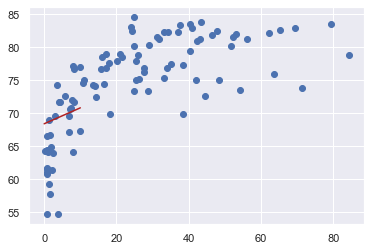

In [10]:
#Running a linear regression. The independent variable (x) is the number of doctors per 10,000 population. The dependent variable (y) is total covid-19 deaths.

x = chart_data[d1]
y= chart_data[d2]

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

from scipy.optimize import curve_fit

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 100)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color='firebrick');
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

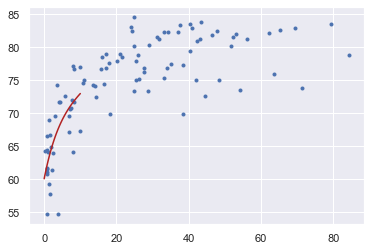

In [11]:
#Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(8),
                           LinearRegression())
        
rng = np.random.RandomState(1)
x = chart_data[d1]
y = chart_data[d2]

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y, marker='.')
plt.plot(xfit, yfit, color = 'firebrick');

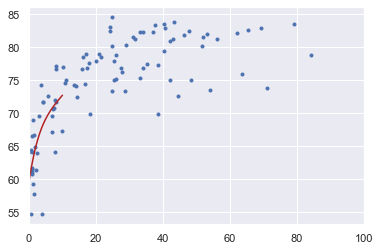

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    x = chart_data[d1]
    y = chart_data[d2]
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(10),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y, marker='.')
plt.plot(xfit, yfit, color='firebrick')
plt.xlim(0, 100);

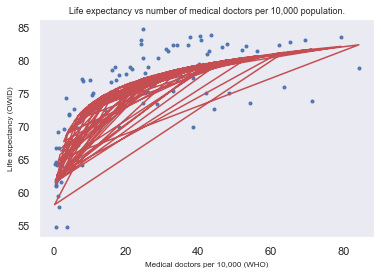

In [13]:

def f(x, a, b, n):
    return a * x ** n  / (x ** n + b)

x = chart_data[d1]
y = chart_data[d2]


popt, pcov = curve_fit(f, x, y, p0=[180, 20, 1], maxfev= 1000)


plt.scatter(x, y, marker='.', alpha=0.95)
fit = f(x, *popt)
plt.plot(x, fit, 'r-')
plt.grid(False)
plt.style.context('light_background')

plt.xlabel('Medical doctors per 10,000 (WHO)', size=8)
plt.ylabel('Life expectancy (OWID)', size=8)
plt.title('Life expectancy vs number of medical doctors per 10,000 population.', size=9)

plt.show()

In [14]:
popt, pcov = curve_fit(f, x, y, p0=[180, 20, 1], maxfev= 1000)
popt

array([122.59637356,   0.95330662,   0.15019978])

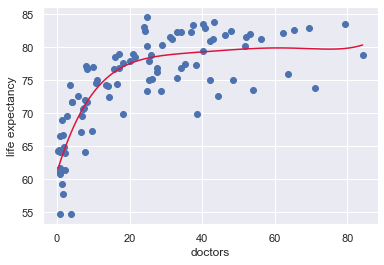

In [22]:
x = chart_data[d1]
y = chart_data[d2]

poly_model = make_pipeline(PolynomialFeatures(5),
                           LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(min(x), max(x), 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit,color='crimson');
plt.xlabel('doctors')
plt.ylabel('life expectancy')

chart_data.to_csv(r'C:\Users\vw191\OneDrive\Documents\GitHub\107SBakst.github.io\data\chart13data.csv')

In [19]:
import seaborn as sns
sns.set()

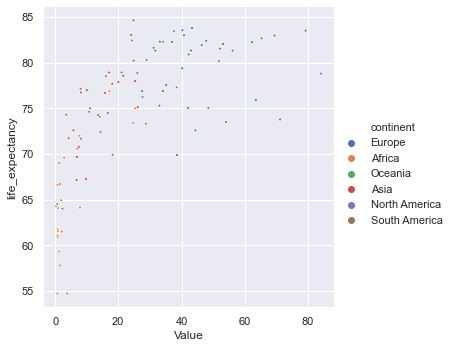

In [20]:
sns.relplot(data=chart_data, x=d1, y=d2, marker='.', hue='continent')

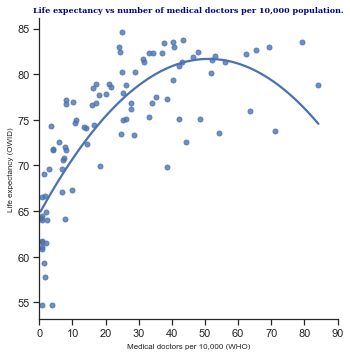

In [23]:
sns.set_style('ticks')


sns.lmplot(x=d1, y=d2, data=chart_data, order = 2, ci=None, scatter_kws={"s": 100}, markers='.', palette=dict(d2='g'))
plt.xlim(0,90)

font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'bold',
        'size': 8,
        }
plt.xlabel('Medical doctors per 10,000 (WHO)', size=8)
plt.ylabel('Life expectancy (OWID)', size=8)
plt.title('Life expectancy vs number of medical doctors per 10,000 population.', size=8, fontdict=font)
plt.savefig(r'C:\Users\vw191\OneDrive\Documents\GitHub\107SBakst.github.io\charts\chart13_regression.png', dpi=150)


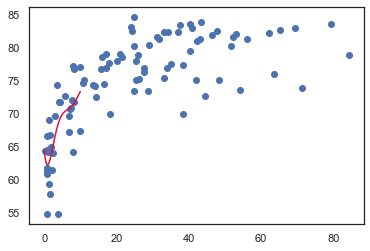

In [342]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit,color='crimson');

In [343]:
from scipy.optimize import curve_fit
